In [1]:
import numpy as np
import pandas as pd

import pickle 
import scipy.stats as stats
from sklearn import metrics
from matplotlib import pyplot as plt
import math

In [2]:
def load_pickle(path):
    with open(path, 'rb') as file:
        data = pickle.load(file)
    return data


macho_veiculo = load_pickle("macho_veiculo.pkl")
macho_flx = load_pickle("macho_flx.pkl")
femea_veiculo = load_pickle("femea_flx_veiculo.pkl")
femea_flx = load_pickle("femea_flx_immo.pkl")


In [3]:
femea_flx["ls_models_1"]

[{'name': 'median',
  'df_colun': 0        1.820188
  1        1.820188
  2        1.820188
  3        1.817903
  4        1.817903
             ...   
  21297    4.769228
  21298    3.870556
  21299    3.870556
  21300    3.097698
  21301    4.223677
  Name: median, Length: 21302, dtype: float64,
  'ls_models': [GaussianMixture(),
   GaussianMixture(n_components=2),
   GaussianMixture(n_components=3),
   GaussianMixture(n_components=4),
   GaussianMixture(n_components=5),
   GaussianMixture(n_components=6),
   GaussianMixture(n_components=7),
   GaussianMixture(n_components=8),
   GaussianMixture(n_components=9),
   GaussianMixture(n_components=10),
   GaussianMixture(n_components=11),
   GaussianMixture(n_components=12),
   GaussianMixture(n_components=13),
   GaussianMixture(n_components=14)],
  'all_models': [[GaussianMixture(),
    GaussianMixture(),
    GaussianMixture(),
    GaussianMixture(),
    GaussianMixture(),
    GaussianMixture(),
    GaussianMixture(),
    GaussianMixtu

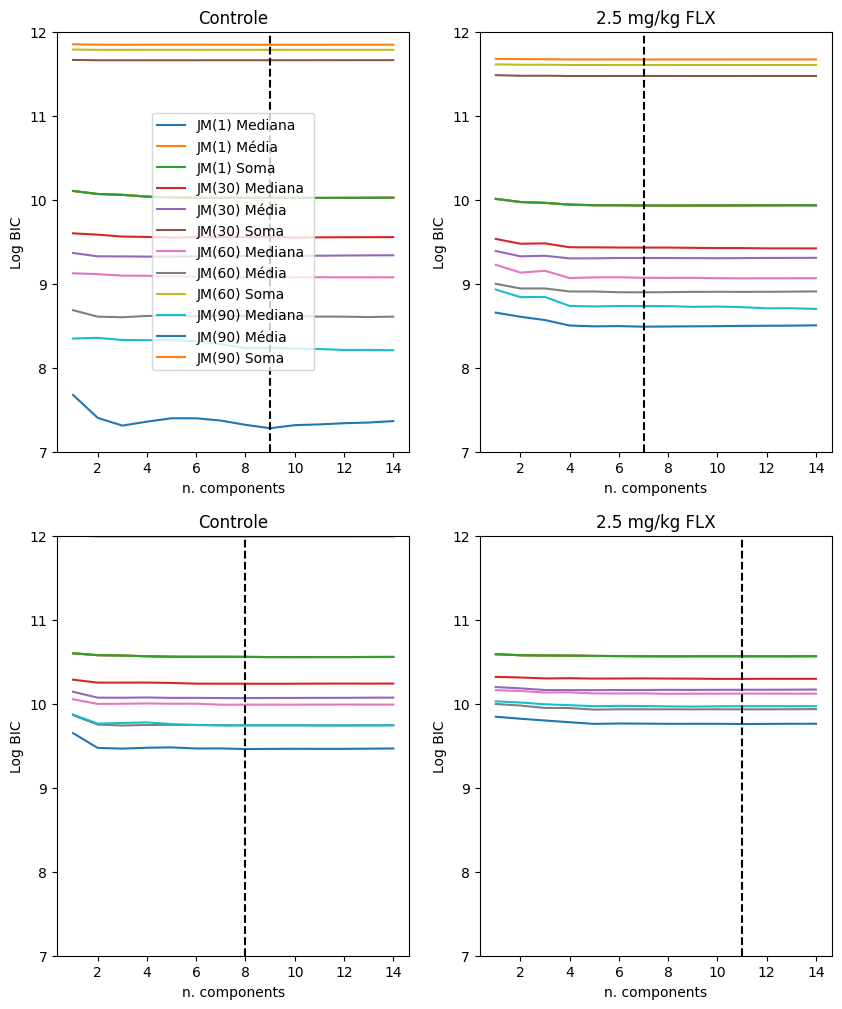

In [4]:


def plot_bic_models(ax, ls_models, title, graph_titulo):
    for m in ls_models:
        AIC = m['AIC']
        BIC = m['BIC']
        BIC_log = list(map(lambda x: math.log(x), BIC))
        N = list(map(lambda x: x+1, range(len(m['AIC']))))
    #     ax.plot(N, AIC, '-k', label=f'AIC_{m.name}')
    #     ax.plot(N, BIC, '--k', label=f'BIC_{m.name}')
    #     ax.plot(N, AIC, label=f'AIC_{m["name"]}')
        # ax.set_ylim([2_000, 200_000])
        dic_t ={
            "median": "Mediana",
            "sum": "Soma",
            "mean": "Média"
        }
        
        ax.set_ylim([7, 12])
        ax.plot(N, BIC_log, label=f'{title} {dic_t[m["name"]]} ')
        ax.set_xlabel('n. components')
        ax.set_ylabel('Log BIC')
        
            
        ax.set_title(graph_titulo)


def plot_all_bic(ax, animal,titulo, r_legend=True):
    plot_bic_models(ax, animal["ls_models_1"], "JM(1)", titulo) 
    plot_bic_models(ax, animal["ls_models_30"], "JM(30)",titulo) 
    plot_bic_models(ax, animal["ls_models_60"], "JM(60)",titulo ) 
    plot_bic_models(ax, animal["ls_models_90"], "JM(90)",titulo ) 
    if r_legend:
        ax.legend()

    best_bic=  animal["ls_models_90"][1]["best_bic"]
    ax.vlines(best_bic+1, 7,12, color="black", linestyles="--")

    # ax.set_xticklabels(list(range(1,13)))
    

fig = plt.figure(figsize=(10, 12))
axs = fig.subplots(nrows=2, ncols=2)


plot_all_bic(axs[0][0], macho_veiculo,"Controle", True)
plot_all_bic(axs[0][1], macho_flx,"2.5 mg/kg FLX", False)
plot_all_bic(axs[1][0], femea_veiculo,"Controle", False)
plot_all_bic(axs[1][1], femea_flx,"2.5 mg/kg FLX", False)

plt.savefig("avaliação_modelos_bic.jpg")

In [5]:
# ls_models_90[1]
# fig = plt.figure(figsize=(10, 12))
# ax = fig.subplots(nrows=1, ncols=1)
# ax.plot(macho_veiculo["ls_models_90"][1]["BIC"], label="macho controle")
# ax.plot(macho_flx["ls_models_90"][1]["BIC"], label="macho flx")
# ax.plot(femea_veiculo["ls_models_90"][1]["BIC"], label="femea controle")
# ax.plot(femea_flx["ls_models_90"][1]["BIC"], label="femea flx")
# ax.legend()

In [11]:
def plt_gaussianas(ax, mo_dic, numero_modelo, title):
#     numero_modelo = 8
#     mo_dic = ls_models[2]
    g = mo_dic['ls_models'][numero_modelo]
    bic_m = mo_dic['BIC'][numero_modelo]
    weights = g.weights_
    means = g.means_
    covars = g.covariances_
    # print(bic_m, weights, means, covars)
    
    x = mo_dic['df_colun']
    f = np.ravel(x).astype(np.float)
    f = f.reshape(-1,1)
#     plt.hist(f, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)
    
    f_axis = f.copy().ravel()
    f_axis.sort()
    for i, valor in enumerate(g.weights_):
        ax.plot(f_axis,weights[i]*stats.norm.pdf(f_axis,means[i],np.sqrt(covars[i])).ravel(), label= f'{i+1}')
        ax.legend()
    # plt.plot(f_axis,weights[1]*stats.norm.pdf(f_axis,means[1],np.sqrt(covars[1])).ravel(), c='red')
    # plt.plot(f_axis,weights[2]*stats.norm.pdf(f_axis,means[2],np.sqrt(covars[2])).ravel(), c='red')
    ax.set_xlim([1, 4.5])
    ax.set_ylim([0, 2.5])
    ax.set_yticks([])
    ax.hist(f, bins=100, histtype='bar', density=True, alpha=0.2)
    # ax.set_xlabel("Postura média de uma janela móvel de 90 quadros")
    ax.set_xlabel("Postura")
    ax.set_title(title)

/tmp/ipykernel_742390/2928719474.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.ravel(x).astype(np.float)


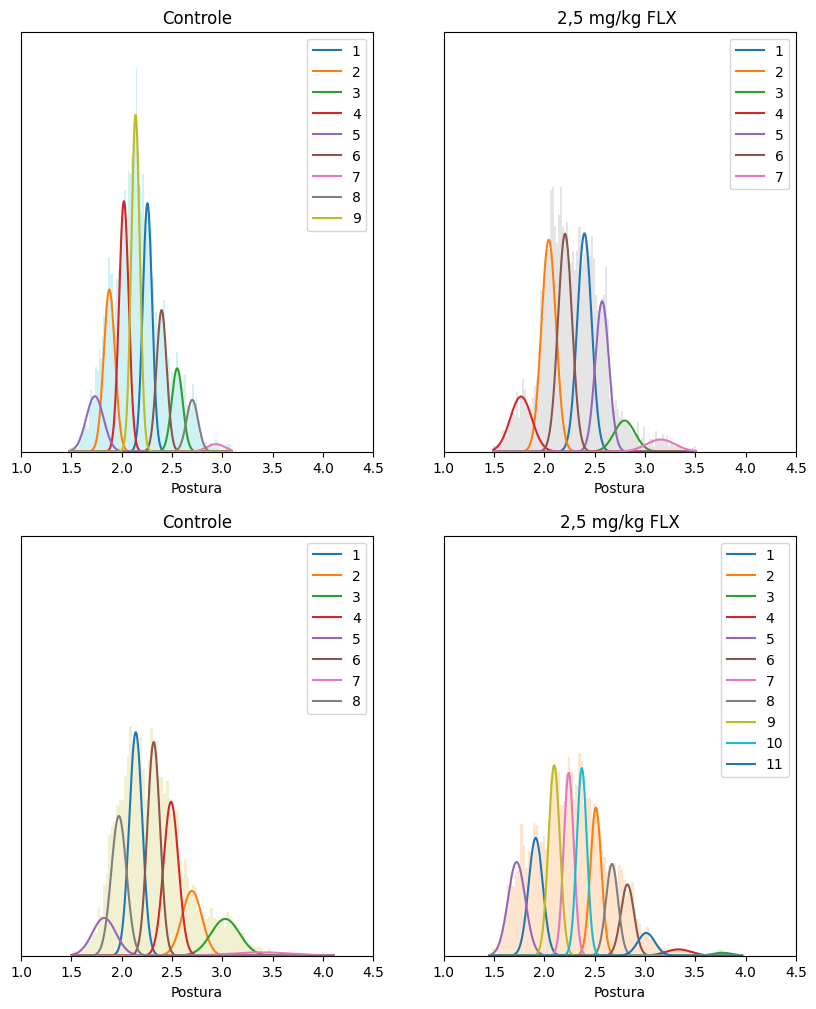

In [12]:
fig = plt.figure(figsize=(10, 12))
ax = fig.subplots(nrows=2, ncols=2)
plt_gaussianas(ax[0,0], macho_veiculo["ls_models_90"][1], macho_veiculo["ls_models_90"][1]["best_bic"], "Controle")
plt_gaussianas(ax[0,1], macho_flx["ls_models_90"][1], macho_flx["ls_models_90"][1]["best_bic"], "2,5 mg/kg FLX ")
plt_gaussianas(ax[1,0], femea_veiculo["ls_models_90"][1], femea_veiculo["ls_models_90"][1]["best_bic"], "Controle")
plt_gaussianas(ax[1,1], femea_flx["ls_models_90"][1], femea_flx["ls_models_90"][1]["best_bic"], "2,5 mg/kg FLX")
plt.savefig("Inferência das formas.jpg")

In [8]:
def print_dados(mo_dic, numero_modelo, title):
    g = mo_dic['ls_models'][numero_modelo]
    bic_m = mo_dic['BIC'][numero_modelo]
    weights = g.weights_
    means = g.means_
    covars = g.covariances_

    ls_dados = []
    for i, valor in enumerate(g.weights_):
        ls_dados.append((means[i][0], 
                          f"N({round(means[i][0],3)}, {round(covars[i][0][0],4)})"))
                         #f"{round(weights[i],3)} * N({round(means[i][0],3)}, {round(covars[i][0][0],4)} )"))#weights[i], means[i], np.sqrt(covars[i])) # variancia

    ls_dados.sort(key=lambda x: x[0])
    return ls_dados
print_dados( macho_veiculo["ls_models_90"][1], macho_veiculo["ls_models_90"][1]["best_bic"], "Controle")

[(1.7339413296481463, 'N(1.734, 0.0074)'),
 (1.8776737340082945, 'N(1.878, 0.0031)'),
 (2.0225075276496076, 'N(2.023, 0.0023)'),
 (2.1383199779311854, 'N(2.138, 0.0018)'),
 (2.256380101795082, 'N(2.256, 0.0022)'),
 (2.396885547961688, 'N(2.397, 0.0026)'),
 (2.551395893411722, 'N(2.551, 0.003)'),
 (2.7014657382959517, 'N(2.701, 0.0034)'),
 (2.93579601364392, 'N(2.936, 0.0081)')]